In [1]:
#results are stored in regularized folder
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def getData(sd, N):
    X = np.random.uniform(0,1,N)
    Z = np.random.normal(0,sd,N)
    Y = np.cos(2*np.pi*X) + Z
    return np.vstack((X,Y)).T

def getMSE(y_pred,y):
    mse = np.mean((y-y_pred)**2)
    return mse

def GD(X,y,n,weights):
    itr = 2000
    lrate = 0.001
    Ein_list = np.zeros(itr)
    Ein=0
    lam = 0.1 #weight decay
    for i in range(itr):
        weights = weights*(1- lam*lrate) - (lrate * (2/n) * (((X.dot(weights) - y).T).dot(X).T))
        Ein_list[i] = getMSE(X.dot(weights), y)
    Ein = Ein_list[itr-1]
    return weights,Ein

def SGD(X,Y,n,weights):
    itr = 2000
    lrate = 0.001
    Ein_list = np.zeros(itr)
    Ein=0
    lam=0.1 #weight decay
    for i in range(itr):
        random_index = random.randint(0,n-1)
        x=X[random_index].reshape(-1,1)
        y=Y[random_index].reshape(-1,1)
        weights = weights*(1-lam*lrate) - (lrate * (2/n) * (((x*weights - y))*x))
        Ein_list[i] = getMSE(X.dot(weights), Y)
    Ein = Ein_list[itr-1]
    return weights,Ein

def Mini_batch(X,Y,n,weights):
    itr = 2000
    lrate = 0.001
    batch_size=50
    Ein_list = np.zeros(itr)
    Ein=0
    lam=0.1 #weight decay
    for i in range(itr):

        if(batch_size>=n):
            x=X
            y=Y
            batch_size=n
        else:
            random_index = random.randint(0,n-batch_size)
            x=X[random_index:random_index+batch_size]
            y=Y[random_index:random_index+batch_size]
        weights = weights*(1-lam*lrate) - (lrate * (2/batch_size) * ((x.dot(weights) - y).T.dot(x).T))
        Ein_list[i] = getMSE(X.dot(weights), Y)
    Ein = Ein_list[itr-1]
    return weights,Ein


#Used for experiment number: 4, else no need
def Mini_batch_noreg(X,Y,n,weights):
    itr = 2000
    lrate = 0.001
    batch_size=50
    Ein_list = np.zeros(itr)
    Ein=0
    for i in range(itr):
        if(batch_size>=n):
            x=X
            y=Y
            batch_size=n
        else:
            random_index = random.randint(0,n-batch_size)
            x=X[random_index:random_index+batch_size]
            y=Y[random_index:random_index+batch_size]
        weights -= lrate * (2/batch_size) * ((x.dot(weights) - y).T.dot(x).T)
        Ein_list[i] = getMSE(X.dot(weights), Y)
    Ein = Ein_list[itr-1]
    return weights,Ein



def fitData(data,d,setter):
    y = data[:,1].reshape((len(data),1))
    x = data[:,0]
    X = np.ones((1,len(data)))
    for i in range(d):
        X = np.vstack((X, x**(i+1)))
    X= X.T
    #print(X)

    #initialize weights
    weights = np.random.random([d+1,1])
    #print(weights)
    #print(((X.dot(weights) - y).T).dot(X).T)
    n=len(data)


    #function setup
    if(setter==1):
        weights,Ein = GD(X,y,n,weights)
    elif(setter ==2):
        weights,Ein = SGD(X,y,n,weights)
    elif(setter==3):
        weights,Ein = Mini_batch(X,y,n,weights)
    else:
        weights,Ein = Mini_batch_noreg(X,y,n,weights)


    return weights,Ein

def testing(tdata,weights,d):
    n=len(tdata)
    y=tdata[:,1].reshape((n,1))
    x = tdata[:,0]
    X = np.ones((1,n))
    for i in range(d):
        X = np.vstack((X, x**(i+1)))
    X=X.T
    Eout = getMSE(X.dot(weights),y)
    return Eout


# Modify the experiment function to accept the 'setter' argument
def experiment(N,sd,d,setter):
    m=50
    Ein_list=[]
    Eout_list=[]
    weight_list=[]
    for i in range(m):
        tempdata = getData(sd,N)
        temp_weight,temp_Ein = fitData(tempdata,d,setter)
        temp_test_data = getData(sd,1000)
        temp_Eout = testing(temp_test_data,temp_weight,d)
        Ein_list.append(temp_Ein)
        Eout_list.append(temp_Eout)
        weight_list.append(temp_weight)

    Ein_avg = np.mean(Ein_list)
    Eout_avg = np.mean(Eout_list)
    weights_avg = np.mean(weight_list,axis=0)

    #Ebias calc starts here
    tempdata=getData(sd,2000)
    Ebias = testing(tempdata,weights_avg,d)
    Egen = abs(Ein_avg-Eout_avg)

    return Ein_avg,Eout_avg,Ebias
    #return Egen,Ebias


d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


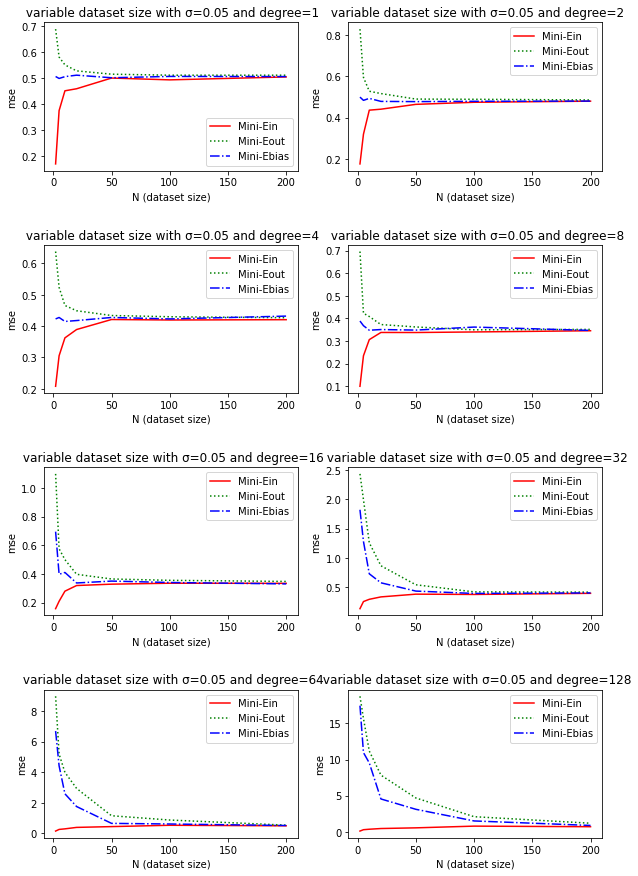

In [2]:
import matplotlib.pyplot as plt
# for mse vs dataset. 8 plots for 8 different degree for vairance 0.05
N=[2,5,10,20,50,100,200]
Deg=[1,2,4,8,16,32,64,128]
GD_list=[[],[],[]]
SGD_list=[[],[],[]]
Mini_list=[[],[],[]]

fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5) # Adjust vertical spacing between subplots

for i, D in enumerate(Deg):
    Mini_list=[[],[],[]]
    
    for j, n in enumerate(N):
        Ein,Eout,Ebias = experiment(n,0.05,D,3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)
    
    row = i // 2
    col = i % 2
    
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Mini-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Mini-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Mini-Ebias')
    title = f' variable dataset size with σ=0.05 and degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')
    axes[row, col].legend()

plt.show()


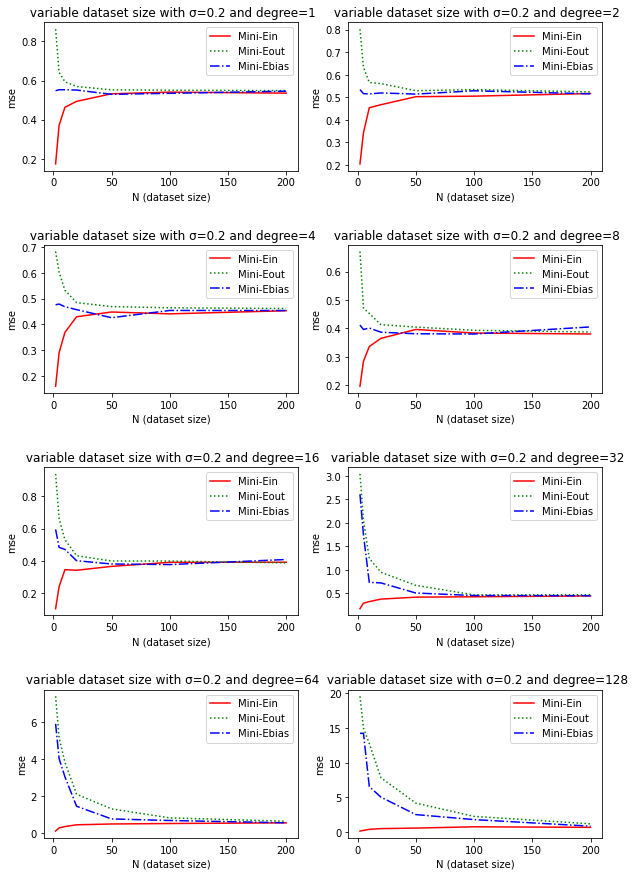

In [3]:
import matplotlib.pyplot as plt
# for mse vs dataset. 8 plots for 8 different degree for vairance 0.2
N=[2,5,10,20,50,100,200]
Deg=[1,2,4,8,16,32,64,128]
GD_list=[[],[],[]]
SGD_list=[[],[],[]]
Mini_list=[[],[],[]]

fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5) # Adjust vertical spacing between subplots

for i, D in enumerate(Deg):
    Mini_list=[[],[],[]]
    
    for j, n in enumerate(N):
        Ein,Eout,Ebias = experiment(n,0.2,D,3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)
    
    row = i // 2
    col = i % 2
    
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Mini-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Mini-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Mini-Ebias')
    title = f' variable dataset size with σ=0.2 and degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')
    axes[row, col].legend()

plt.show()
